In [123]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import style
#%matplotlib inline
style.use('ggplot')
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [81]:
data= pd.read_csv("TATAMOTORS_5y.csv", parse_dates=True, index_col=0)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-11-25,373.196991,382.992004,373.196991,382.052002,380.254822,3853065.0
2013-11-26,383.536011,387.246002,375.027008,386.109009,384.292725,5239357.0
2013-11-27,389.324005,395.656006,388.433990,394.963989,393.106049,6778369.0
2013-11-28,398.821991,400.752014,390.411987,393.677002,391.825134,9209777.0
2013-11-29,394.765991,397.585999,391.105011,394.468994,392.613403,4868508.0


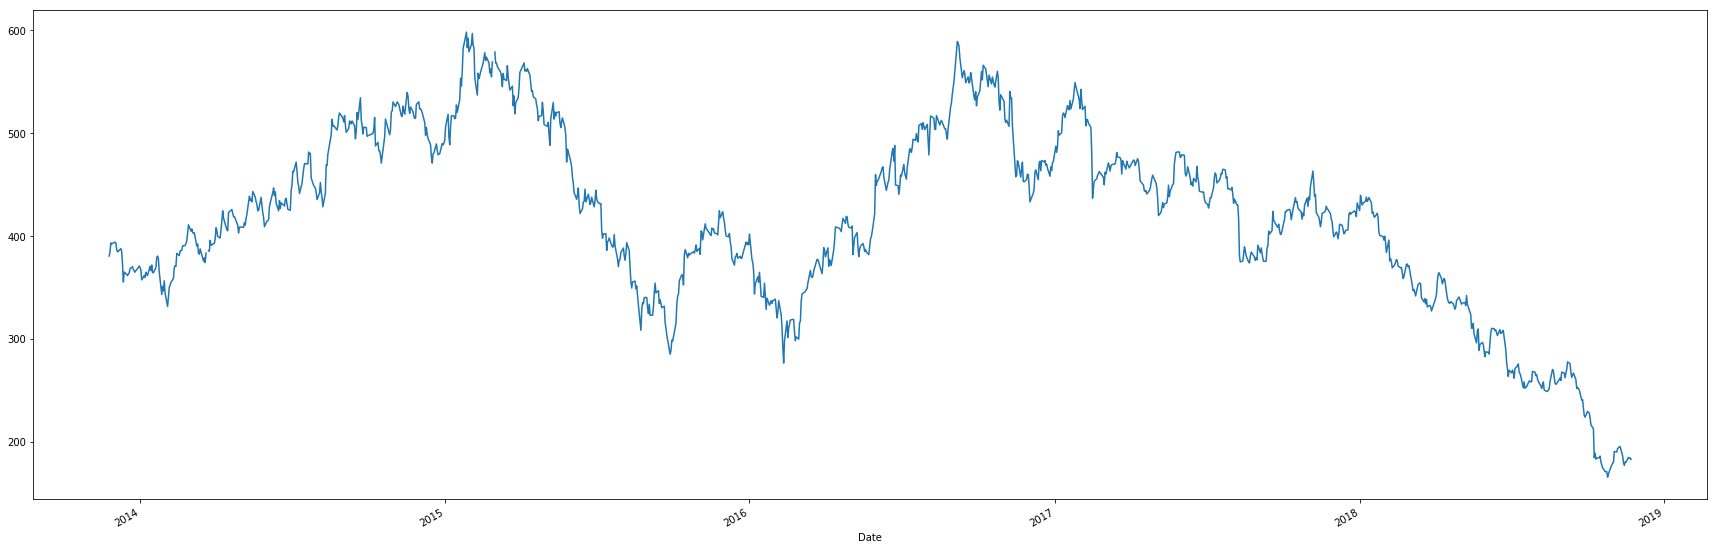

In [88]:
plt.figure(figsize=(30,10))
data["Adj Close"].plot()
plt.show()

<Figure size 2160x720 with 0 Axes>

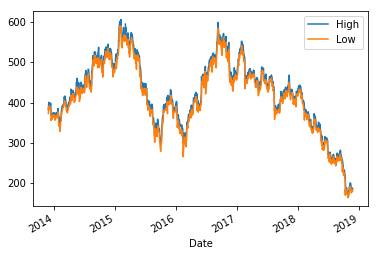

In [90]:
plt.figure(figsize=(30,10))
data[["High","Low"]].plot()
plt.show()

In [91]:
data["100ma"]= data["Adj Close"].rolling(window=100).mean()

In [94]:
data.head()

#Getting NAs as the rolling avg is for an window of 100 previous observations which is not available for first 100 observations

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2013-11-25,373.196991,382.992004,373.196991,382.052002,380.254822,3853065.0,NaN
2013-11-26,383.536011,387.246002,375.027008,386.109009,384.292725,5239357.0,NaN
2013-11-27,389.324005,395.656006,388.433990,394.963989,393.106049,6778369.0,NaN
2013-11-28,398.821991,400.752014,390.411987,393.677002,391.825134,9209777.0,NaN
2013-11-29,394.765991,397.585999,391.105011,394.468994,392.613403,4868508.0,NaN


In [95]:
data["100ma"]= data["Adj Close"].rolling(window=100, min_periods=0).mean()
data.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2013-11-25,373.196991,382.992004,373.196991,382.052002,380.254822,3853065.0,380.254822
2013-11-26,383.536011,387.246002,375.027008,386.109009,384.292725,5239357.0,382.273774
2013-11-27,389.324005,395.656006,388.433990,394.963989,393.106049,6778369.0,385.884532
2013-11-28,398.821991,400.752014,390.411987,393.677002,391.825134,9209777.0,387.369683
2013-11-29,394.765991,397.585999,391.105011,394.468994,392.613403,4868508.0,388.418427


In [109]:
#Creating subplot of actual "Adj Close" and 100 "Moving Average" along with the "Volume"

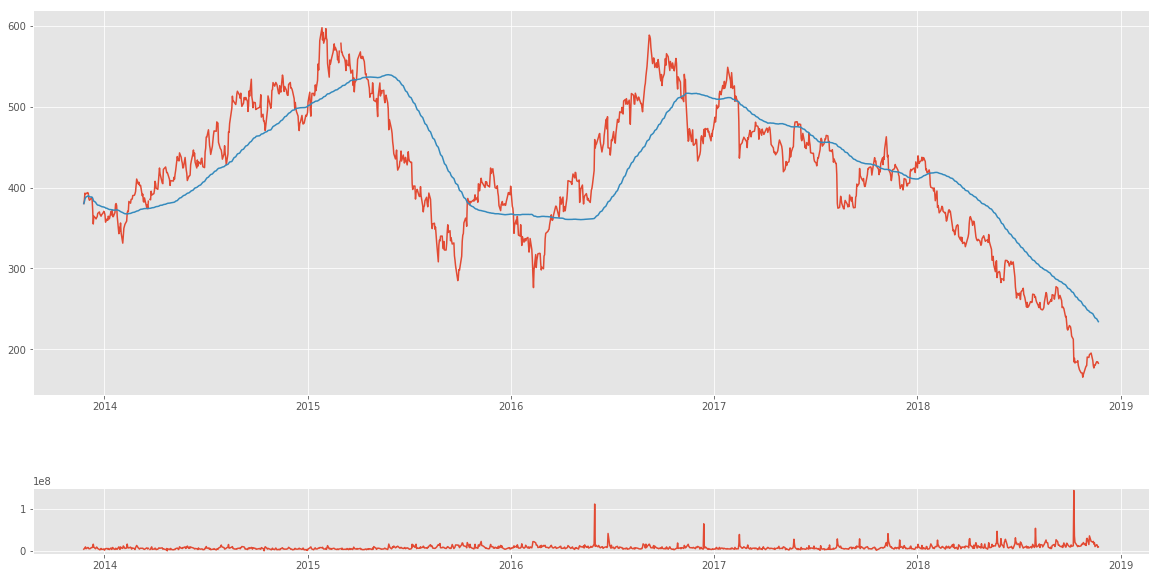

In [117]:
plt.figure(figsize=(20,10))

ax1= plt.subplot2grid((7,1),(0,0), rowspan=5, colspan=1)
ax2= plt.subplot2grid((7,1),(6,0), rowspan=1, colspan=1, sharex=ax1)
ax1.plot(data.index, data["Adj Close"])
ax1.plot(data.index, data["100ma"])
ax2.plot(data.index, data["Volume"])

plt.show()

In [68]:
#create a candlestick / OHLC graph based on the "Adj Close" column
#An OHLC chart, called a candlestick chart, is a chart that condenses the open, 
#high, low, and close data all in one nice format

numpy.ndarray

In [125]:
data_ohlc= data["Adj Close"].resample('10D').ohlc()
data_ohlc.head()

,open,high,low,close
Date,,,,
2013-11-25,380.254822,393.794830,380.254822,386.655579
2013-12-05,384.341461,387.443817,354.947418,364.696350
2013-12-15,362.431061,369.915680,361.249634,366.960632
2013-12-25,364.597809,370.654175,357.162964,357.162964
2014-01-04,361.348175,370.407318,359.525787,370.407318


In [128]:
data_volume= data["Volume"].resample('10D').sum()

In [129]:
data_ohlc.head()

,open,high,low,close
Date,,,,
2013-11-25,380.254822,393.794830,380.254822,386.655579
2013-12-05,384.341461,387.443817,354.947418,364.696350
2013-12-15,362.431061,369.915680,361.249634,366.960632
2013-12-25,364.597809,370.654175,357.162964,357.162964
2014-01-04,361.348175,370.407318,359.525787,370.407318


In [130]:
data_volume.head()

Date
2013-11-25    50279367.0
2013-12-05    58084253.0
2013-12-15    39104044.0
2013-12-25    26440380.0
2014-01-04    28377890.0
Name: Volume, dtype: float64

In [148]:
data_ohlc=data_ohlc.reset_index()

In [150]:
#For ohlc convert date to number

data_ohlc["Date"]= data_ohlc["Date"].map(mdates.date2num)

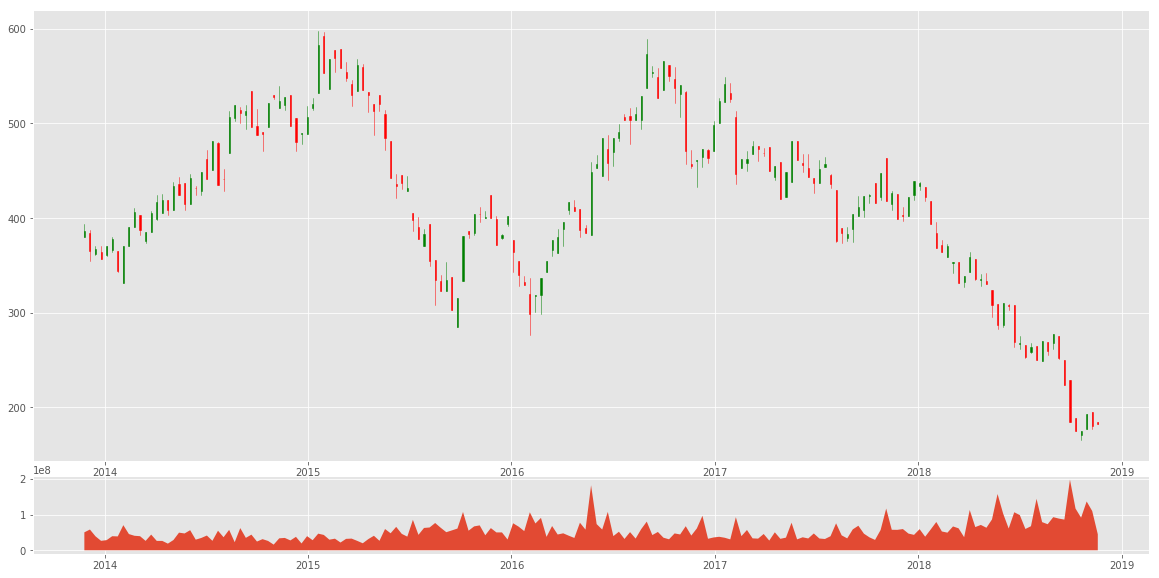

In [158]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, data_ohlc.values, width=2, colorup='g')
ax2.fill_between(data_volume.index.map(mdates.date2num),data_volume.values,0)
plt.show()